In [1]:
import pandas as pd
from itertools import product

import gurobipy as gp
from gurobipy import GRB

In [2]:
df_dea = pd.read_csv('dea.csv')
df_dea

,dmus,input1,input2,output
0,A,4,3,2
1,B,1,6,5
2,C,2,3,4
3,D,1,2,1
4,E,10,5,8


In [3]:
inattr = ['input1','input2']
outattr = ['output']

inputs = df_dea[['dmus'] + inattr].set_index('dmus').T.to_dict()
outputs = df_dea[['dmus'] + outattr].set_index('dmus').T.to_dict()
dmus = df_dea['dmus'].to_list()

### Create LP model
model = gp.Model('DEA')

# Decision variables
wout = model.addVars(outattr, name="outputWeight")
win = model.addVars(inattr, name="inputWeight")

# Constraints
ratios = model.addConstrs( ( gp.quicksum(outputs[h][r]*wout[r] for r in outattr ) 
                            - gp.quicksum(inputs[h][i]*win[i] for i in inattr ) 
                            <= 0 for h in dmus ), name='ratios' )


target = 'A'
normalization = model.addConstr((gp.quicksum(inputs[target][i]*win[i] for i in inattr ) == 1 ),
                                name='normalization')
    
# Objective function
model.setObjective(gp.quicksum(outputs[target][r]*wout[r] for r in outattr ), GRB.MAXIMIZE)
    
model.params.OutputFlag = 0
model.optimize()
    
# Print results
print(f"\nThe efficiency of target DMU {target} is {round(model.objVal,3)}") 

print("__________________________________________________________________")
print(f"The weights for the inputs are:")
for i in inattr:
    print(f"For {i}: {round(win[i].x,3)} ") 

print("__________________________________________________________________")
print(f"The weights for the outputs are")
for r in outattr:
    print(f"For {r} is: {round(wout[r].x,3)} ") 
print("__________________________________________________________________\n\n")  

Restricted license - for non-production use only - expires 2023-10-25

The efficiency of target DMU A is 0.455
__________________________________________________________________
The weights for the inputs are:
For input1: 0.045 
For input2: 0.273 
__________________________________________________________________
The weights for the outputs are
For output is: 0.227 
__________________________________________________________________




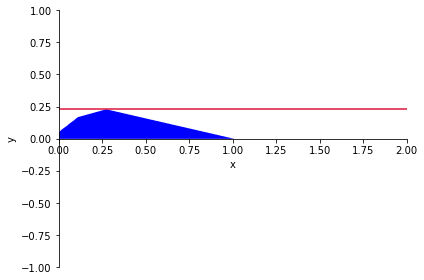

In [11]:
from sympy import *

x, y = symbols('x y')
expr = (y<=(21/20)*x+(1/20)) & (y<=(3/8)*x+(1/8)) & (y<=(5/4)*x+(1/4)) & (y<=-(5/16)*x+(5/16)) & (y>0) 
p1 = plot_implicit(expr, (x, 0, 2), (y, -1, 1), show=False)
p2 = plot(wout['output'].x, line_color='crimson', show=False)
p1.append(p2[0])
p1.show()